## Figure 7 (Journal of Climate submission; Molina et al.)

Fig.7. Spectral analysis of area weighted averages of monthly SSTs (◦C) across regions indicated in Fig. 3.Years 201-500 were considered for the Global and Pacific experiments and years 1,001-1,300 were consideredfor the CESM1 control for correspondence to the sensitivity experiments during AMOC collapse. Years 101-250were considered for the Pacific Salt experiment, which were the years PMOC was active.  Simulations andcorresponding frequency of maximum variance for the tropical Pacific are indicated in the legend (f). Starmarkers represent peak variance for each respective experiment and region.

**Figure by: Maria J. Molina, NCAR**

In [1]:
# imports 

import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cftime
from climatico.util import weighted_mean, pacific_lon
import subprocess
import copy
from datetime import timedelta

In [2]:
from config import directory_figs, directory_data

In [3]:
# list of filenames to do this for

file_g02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG02Sv.pop.h.SST.*.nc'
file_g04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalG04Sv.pop.h.SST.*.nc'
file_p02sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP02Sv.pop.h.SST.*.nc'
file_p04sv = 'b1d.e11.B1850LENS.f09_g16.FWAtSalP04Sv.pop.h.SST.*.nc'
file_psalt = 'b1d.e11.B1850LENS.f09_g16.FWPaSalP04Sv.pop.h.SST.*.nc'
file_cntrl = 'b1d.e11.B1850C5CN.f09_g16.005.pop.h.SST.*.nc'
obs_oissts = '/gpfs/fs1/collections/rda/data/ds277.7/avhrr_v2.1/*/oisst-avhrr-v02r01.*.nc'

In [4]:
ds_cntrl = xr.open_mfdataset(f'{directory_data}{file_cntrl}', combine='by_coords')
ds_cntrl = ds_cntrl.assign_coords(time=ds_cntrl.coords['time'] - timedelta(days=17))
ds_cntrl = ds_cntrl.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(1001, 1, 1, 0, 0),cftime.DatetimeNoLeap(1301, 1, 1, 0, 0)))

ds_g02sv = xr.open_mfdataset(f'{directory_data}{file_g02sv}', combine='by_coords')
ds_g02sv = ds_g02sv.assign_coords(time=ds_g02sv.coords['time'] - timedelta(days=17))
ds_g02sv = ds_g02sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))

ds_g04sv = xr.open_mfdataset(f'{directory_data}{file_g04sv}', combine='by_coords')
ds_g04sv = ds_g04sv.assign_coords(time=ds_g04sv.coords['time'] - timedelta(days=17))
ds_g04sv = ds_g04sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))

ds_p02sv = xr.open_mfdataset(f'{directory_data}{file_p02sv}', combine='by_coords')
ds_p02sv = ds_p02sv.assign_coords(time=ds_p02sv.coords['time'] - timedelta(days=17))
ds_p02sv = ds_p02sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))

ds_p04sv = xr.open_mfdataset(f'{directory_data}{file_p04sv}', combine='by_coords')
ds_p04sv = ds_p04sv.assign_coords(time=ds_p04sv.coords['time'] - timedelta(days=17))
ds_p04sv = ds_p04sv.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(201, 1, 1, 0, 0),cftime.DatetimeNoLeap(501, 1, 1, 0, 0)))

ds_psalt = xr.open_mfdataset(f'{directory_data}{file_psalt}', combine='by_coords')
ds_psalt = ds_psalt.assign_coords(time=ds_psalt.coords['time'] - timedelta(days=17))
ds_psalt = ds_psalt.isel(z_t=0)['SST'].sel(time=slice(cftime.DatetimeNoLeap(101, 1, 1, 0, 0),cftime.DatetimeNoLeap(251, 1, 1, 0, 0)))

ds_oisst = xr.open_mfdataset(f'{obs_oissts}', combine='by_coords')
ds_oisst = ds_oisst.isel(zlev=0)['sst'].sel(time=slice('1982-01-01','2020-12-31')).resample(time='MS').mean(skipna=True)

In [5]:
def grab_wghtmean(ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst = None, obs = False,
                      lon1 = 170.5, lon2 = -150.5, lat1 = 30.5, lat2 = 40.5):
    """
    Region to take weighted mean for.
    """
    if obs == False:
        try:
            assert ds_oisst == None
            print("passed, no ds_oisst")
        except ValueError:
            print("ds_oisst not None, set obs to True")

    if obs == True:
        try:
            assert ds_oisst == None
            print("please insert ds_oisst")
        except ValueError:
            print("passed, ds_oisst data input")
    
    ds_cntrl_box = weighted_mean(ds_cntrl.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_g02sv_box = weighted_mean(ds_g02sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_g04sv_box = weighted_mean(ds_g04sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_p02sv_box = weighted_mean(ds_p02sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_p04sv_box = weighted_mean(ds_p04sv.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')

    ds_psalt_box = weighted_mean(ds_psalt.sel(
        lon=slice(pacific_lon(lon1, to180=False),
                  pacific_lon(lon2, to180=False)), 
        lat=slice(lat1,lat2)), 
                  lat_name='lat')
    
    if obs:
        
        ds_oisst_box = weighted_mean(ds_oisst.sel(
            lon=slice(pacific_lon(lon1, to180=False),
                      pacific_lon(lon2, to180=False)), 
            lat=slice(lat1,lat2)), 
                      lat_name='lat')

    if not obs:
        return ds_cntrl_box, ds_g02sv_box, ds_g04sv_box, ds_p02sv_box, ds_p04sv_box, ds_psalt_box
    
    if obs:
        return ds_cntrl_box, ds_g02sv_box, ds_g04sv_box, ds_p02sv_box, ds_p04sv_box, ds_psalt_box, ds_oisst_box

In [6]:
def grab_specx(da, variable='SST'):
    """
    Calling to ncl directory to use spectral analysis ncl scripts.
    Input your directory into the function.
    Use ``os.path.dirname(os.getcwd())+'/ncl/'`` to find your respective path.

    Args:
        da: Xarray data array .
        variables (str): Variable name. Defaults to ``SST``.
    """
    da.to_dataset(name=variable).to_netcdf('/glade/u/home/molina/python_scripts/climatico/ncl/box_sst.nc')
    subprocess.call([f'ml intel/18.0.5; ml ncl; ncl /glade/u/home/molina/python_scripts/climatico/ncl/specx_anal.ncl'], shell=True)
    spcx = xr.open_dataset("~/python_scripts/climatico/ncl/spcx.nc")
    frqx = xr.open_dataset("~/python_scripts/climatico/ncl/frq.nc")
    spcxa = copy.deepcopy(spcx['spcx'].squeeze().values)
    frqxa = copy.deepcopy(frqx['frq'].squeeze().values)
    del spcx
    del frqx
    return spcxa, frqxa

def grab_specx_oisst(da, variable='SST'):
    """
    Calling to ncl directory to use spectral analysis ncl scripts.
    Input your directory into the function.
    Use ``os.path.dirname(os.getcwd())+'/ncl/'`` to find your respective path.

    Args:
        da: Xarray data array .
        variables (str): Variable name. Defaults to ``SST``.
    """
    da.to_dataset(name=variable).to_netcdf('/glade/u/home/molina/python_scripts/climatico/ncl/box_sst.nc')
    subprocess.call([f'ml intel/18.0.5; ml ncl; ncl /glade/u/home/molina/python_scripts/climatico/ncl/specx_anal_oisst.ncl'], shell=True)
    spcx = xr.open_dataset("~/python_scripts/climatico/ncl/spcx.nc")
    frqx = xr.open_dataset("~/python_scripts/climatico/ncl/frq.nc")
    spcxa = copy.deepcopy(spcx['spcx'].squeeze().values)
    frqxa = copy.deepcopy(frqx['frq'].squeeze().values)
    del spcx
    del frqx
    return spcxa, frqxa

In [7]:
%%capture
# north pacific
ds_cntrl_box, ds_g02sv_box, ds_g04sv_box, ds_p02sv_box, ds_p04sv_box, ds_psalt_box, ds_oisst_box = grab_wghtmean(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = 170.5, lon2 = -150.5, lat1 = 30.5, lat2 = 40.5)
# control
spcx_cntrl1, frqx_cntrl1 = grab_specx(ds_cntrl_box)
# 2svg
spcx_g02sv1, frqx_g02sv1 = grab_specx(ds_g02sv_box)
# 4svg
spcx_g04sv1, frqx_g04sv1 = grab_specx(ds_g04sv_box)
# 2svp
spcx_p02sv1, frqx_p02sv1 = grab_specx(ds_p02sv_box)
# 4svp
spcx_p04sv1, frqx_p04sv1 = grab_specx(ds_p04sv_box)
# psalt
spcx_psalt1, frqx_psalt1 = grab_specx(ds_psalt_box)
# oisst
spcx_oisst1, frqx_oisst1 = grab_specx_oisst(ds_oisst_box)

In [8]:
%%capture
# north atlantic
ds_cntrl_box, ds_g02sv_box, ds_g04sv_box, ds_p02sv_box, ds_p04sv_box, ds_psalt_box, ds_oisst_box = grab_wghtmean(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = -50.5, lon2 = -20.5, lat1 = 30.5, lat2 = 40.5)
# control
spcx_cntrl2, frqx_cntrl2 = grab_specx(ds_cntrl_box)
# 2svg
spcx_g02sv2, frqx_g02sv2 = grab_specx(ds_g02sv_box)
# 4svg
spcx_g04sv2, frqx_g04sv2 = grab_specx(ds_g04sv_box)
# 2svp
spcx_p02sv2, frqx_p02sv2 = grab_specx(ds_p02sv_box)
# 4svp
spcx_p04sv2, frqx_p04sv2 = grab_specx(ds_p04sv_box)
# psalt
spcx_psalt2, frqx_psalt2 = grab_specx(ds_psalt_box)
# oisst
spcx_oisst2, frqx_oisst2 = grab_specx_oisst(ds_oisst_box)

In [9]:
%%capture
# equatorial pacific
ds_cntrl_box, ds_g02sv_box, ds_g04sv_box, ds_p02sv_box, ds_p04sv_box, ds_psalt_box, ds_oisst_box = grab_wghtmean(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = -170.5, lon2 = -120.5, lat1 = -5.5, lat2 = 5.5)
# control
spcx_cntrl3, frqx_cntrl3 = grab_specx(ds_cntrl_box)
# 2svg
spcx_g02sv3, frqx_g02sv3 = grab_specx(ds_g02sv_box)
# 4svg
spcx_g04sv3, frqx_g04sv3 = grab_specx(ds_g04sv_box)
# 2svp
spcx_p02sv3, frqx_p02sv3 = grab_specx(ds_p02sv_box)
# 4svp
spcx_p04sv3, frqx_p04sv3 = grab_specx(ds_p04sv_box)
# psalt
spcx_psalt3, frqx_psalt3 = grab_specx(ds_psalt_box)
# oisst
spcx_oisst3, frqx_oisst3 = grab_specx_oisst(ds_oisst_box)

In [10]:
%%capture
# south pacific
ds_cntrl_box, ds_g02sv_box, ds_g04sv_box, ds_p02sv_box, ds_p04sv_box, ds_psalt_box, ds_oisst_box = grab_wghtmean(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = -160.5, lon2 = -110.5, lat1 = -40.5, lat2 = -30.5)
# control
spcx_cntrl4, frqx_cntrl4 = grab_specx(ds_cntrl_box)
# 2svg
spcx_g02sv4, frqx_g02sv4 = grab_specx(ds_g02sv_box)
# 4svg
spcx_g04sv4, frqx_g04sv4 = grab_specx(ds_g04sv_box)
# 2svp
spcx_p02sv4, frqx_p02sv4 = grab_specx(ds_p02sv_box)
# 4svp
spcx_p04sv4, frqx_p04sv4 = grab_specx(ds_p04sv_box)
# psalt
spcx_psalt4, frqx_psalt4 = grab_specx(ds_psalt_box)
# oisst
spcx_oisst4, frqx_oisst4 = grab_specx_oisst(ds_oisst_box)

In [11]:
%%capture
# south atlantic
ds_cntrl_box, ds_g02sv_box, ds_g04sv_box, ds_p02sv_box, ds_p04sv_box, ds_psalt_box, ds_oisst_box = grab_wghtmean(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = -30.5, lon2 = -0.5, lat1 = -40.5, lat2 = -30.5)
# control
spcx_cntrl5, frqx_cntrl5 = grab_specx(ds_cntrl_box)
# 2svg
spcx_g02sv5, frqx_g02sv5 = grab_specx(ds_g02sv_box)
# 4svg
spcx_g04sv5, frqx_g04sv5 = grab_specx(ds_g04sv_box)
# 2svp
spcx_p02sv5, frqx_p02sv5 = grab_specx(ds_p02sv_box)
# 4svp
spcx_p04sv5, frqx_p04sv5 = grab_specx(ds_p04sv_box)
# psalt
spcx_psalt5, frqx_psalt5 = grab_specx(ds_psalt_box)
# oisst
spcx_oisst5, frqx_oisst5 = grab_specx_oisst(ds_oisst_box)

In [12]:
%%capture
# equatorial atlantic
ds_cntrl_box, ds_g02sv_box, ds_g04sv_box, ds_p02sv_box, ds_p04sv_box, ds_psalt_box, ds_oisst_box = grab_wghtmean(
    ds_cntrl, ds_g02sv, ds_g04sv, ds_p02sv, ds_p04sv, ds_psalt, ds_oisst, obs = True, lon1 = -20.5, lon2 = -0.5, lat1 = -3.5, lat2 = 3.5)
# control
spcx_cntrl6, frqx_cntrl6 = grab_specx(ds_cntrl_box)
# 2svg
spcx_g02sv6, frqx_g02sv6 = grab_specx(ds_g02sv_box)
# 4svg
spcx_g04sv6, frqx_g04sv6 = grab_specx(ds_g04sv_box)
# 2svp
spcx_p02sv6, frqx_p02sv6 = grab_specx(ds_p02sv_box)
# 4svp
spcx_p04sv6, frqx_p04sv6 = grab_specx(ds_p04sv_box)
# psalt
spcx_psalt6, frqx_psalt6 = grab_specx(ds_psalt_box)
# oisst
spcx_oisst6, frqx_oisst6 = grab_specx_oisst(ds_oisst_box)

In [13]:
# max values per plot for normalizing

ax1_max = np.array([spcx_cntrl1.max(),spcx_g02sv1.max(),spcx_g04sv1.max(),spcx_p02sv1.max(),spcx_p04sv1.max(),spcx_psalt1.max(),spcx_oisst1.max()]).max()
ax2_max = np.array([spcx_cntrl2.max(),spcx_g02sv2.max(),spcx_g04sv2.max(),spcx_p02sv2.max(),spcx_p04sv2.max(),spcx_psalt2.max(),spcx_oisst2.max()]).max()
ax3_max = np.array([spcx_cntrl3.max(),spcx_g02sv3.max(),spcx_g04sv3.max(),spcx_p02sv3.max(),spcx_p04sv3.max(),spcx_psalt3.max(),spcx_oisst3.max()]).max()
ax5_max = np.array([spcx_cntrl4.max(),spcx_g02sv4.max(),spcx_g04sv4.max(),spcx_p02sv4.max(),spcx_p04sv4.max(),spcx_psalt4.max(),spcx_oisst4.max()]).max()
ax6_max = np.array([spcx_cntrl5.max(),spcx_g02sv5.max(),spcx_g04sv5.max(),spcx_p02sv5.max(),spcx_p04sv5.max(),spcx_psalt5.max(),spcx_oisst5.max()]).max()
ax4_max = np.array([spcx_cntrl6.max(),spcx_g02sv6.max(),spcx_g04sv6.max(),spcx_p02sv6.max(),spcx_p04sv6.max(),spcx_psalt6.max(),spcx_oisst6.max()]).max()

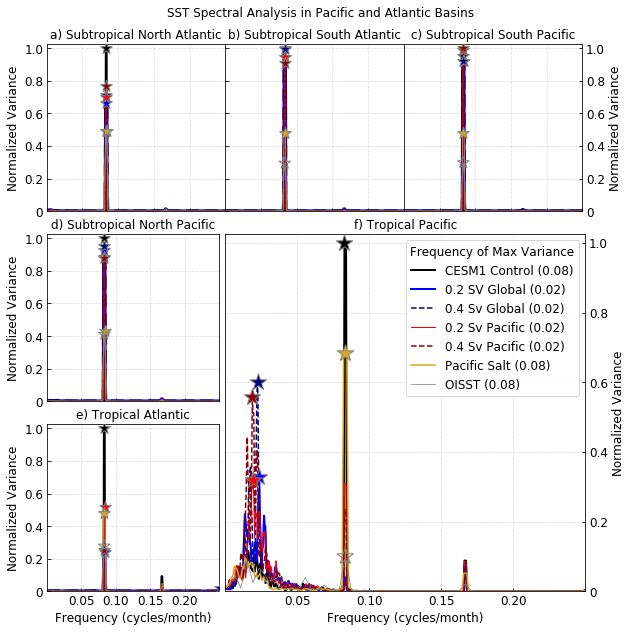

In [15]:
# -------------- create figure

a = u"\u00b0"
vanom1=-10
vanom2=10

fig = plt.figure(figsize=(8,8))

fig.suptitle('SST Spectral Analysis in Pacific and Atlantic Basins', fontsize=12, x=0.475, y=1.015)

# --------------

ax2 = plt.axes([0., 0.66, 0.31, 0.29])
ax2.set_title('a) Subtropical North Atlantic', fontsize=12)

ax2.plot(frqx_cntrl2, spcx_cntrl2/ax2_max, c='k', lw=2, ls='-')
ax2.plot(frqx_g02sv2, spcx_g02sv2/ax2_max, c='b', lw=3.5, ls='-')
ax2.plot(frqx_g04sv2, spcx_g04sv2/ax2_max, c='navy', lw=3.5, ls='--')
ax2.plot(frqx_p02sv2, spcx_p02sv2/ax2_max, c='red', lw=1., ls='-')
ax2.plot(frqx_p04sv2, spcx_p04sv2/ax2_max, c='darkred', lw=1., ls='--')
ax2.plot(frqx_psalt2, spcx_psalt2/ax2_max, c='goldenrod', lw=0.75, ls='-')
ax2.plot(frqx_oisst2, spcx_oisst2/ax2_max, c='grey', ls='-', lw=0.75)

ax2.scatter(frqx_cntrl2[np.argmax(spcx_cntrl2)], spcx_cntrl2[np.argmax(spcx_cntrl2)] / ax2_max,
            s=150, marker='*', edgecolors='grey', facecolor='k', zorder=100)
ax2.scatter(frqx_g02sv2[np.argmax(spcx_g02sv2)], spcx_g02sv2[np.argmax(spcx_g02sv2)] / ax2_max,
            s=150, marker='*', edgecolors='grey', facecolor='b', zorder=100)
ax2.scatter(frqx_g04sv2[np.argmax(spcx_g04sv2)], spcx_g04sv2[np.argmax(spcx_g04sv2)] / ax2_max,
            s=150, marker='*', edgecolors='grey', facecolor='navy', zorder=100)
ax2.scatter(frqx_p02sv2[np.argmax(spcx_p02sv2)], spcx_p02sv2[np.argmax(spcx_p02sv2)] / ax2_max,
            s=150, marker='*', edgecolors='grey', facecolor='red', zorder=100)
ax2.scatter(frqx_p04sv2[np.argmax(spcx_p04sv2)], spcx_p04sv2[np.argmax(spcx_p04sv2)] / ax2_max,
            s=150, marker='*', edgecolors='grey', facecolor='darkred', zorder=100)
ax2.scatter(frqx_psalt2[np.argmax(spcx_psalt2)], spcx_psalt2[np.argmax(spcx_psalt2)] / ax2_max,
            s=150, marker='*', edgecolors='grey', facecolor='goldenrod', zorder=100)
ax2.scatter(frqx_oisst2[np.argmax(spcx_oisst2)], spcx_oisst2[np.argmax(spcx_oisst2)] / ax2_max,
            s=150, marker='*', edgecolors='grey', facecolor='none', zorder=100)

ax2.set_ylim([0,1.025])
ax2.set_xlim([0,0.2])
ax2.margins(x=0)
ax2.tick_params(axis='both', labelleft=True, direction='in', labelbottom=False)
ax2.grid(alpha=0.4, ls='--')
ax2.set_ylabel('Normalized Variance', fontsize=12)

ax2.set_xticks([0.05,0.1,.15,.2,.25])
ax2.set_yticks([0,0.2,0.4,0.6,0.8,1.])
ax2.set_yticklabels([0,0.2,0.4,0.6,0.8,1.], fontsize=12)

one=str(np.round(frqx_cntrl2[np.argmax(spcx_cntrl2)],2))

# --------------

ax6 = plt.axes([0.31, 0.66, 0.31, 0.29])
ax6.set_title('b) Subtropical South Atlantic', fontsize=12)

ax6.plot(frqx_cntrl5, spcx_cntrl5/ax6_max, c='k', lw=2, ls='-')
ax6.plot(frqx_g02sv5, spcx_g02sv5/ax6_max, c='b', lw=3.5, ls='-')
ax6.plot(frqx_g04sv5, spcx_g04sv5/ax6_max, c='navy', lw=3.5, ls='--')
ax6.plot(frqx_p02sv5, spcx_p02sv5/ax6_max, c='red', lw=1., ls='-')
ax6.plot(frqx_p04sv5, spcx_p04sv5/ax6_max, c='darkred', lw=1., ls='--')
ax6.plot(frqx_psalt5, spcx_psalt5/ax6_max, c='goldenrod', lw=0.75, ls='-')
ax6.plot(frqx_oisst5, spcx_oisst5/ax6_max, c='grey', ls='-', lw=0.75)

ax6.scatter(frqx_cntrl5[np.argmax(spcx_cntrl5)], spcx_cntrl5[np.argmax(spcx_cntrl5)] / ax6_max,
            s=150, marker='*', edgecolors='grey', facecolor='k', zorder=100)
ax6.scatter(frqx_g02sv5[np.argmax(spcx_g02sv5)], spcx_g02sv5[np.argmax(spcx_g02sv5)] / ax6_max,
            s=150, marker='*', edgecolors='grey', facecolor='b', zorder=100)
ax6.scatter(frqx_g04sv5[np.argmax(spcx_g04sv5)], spcx_g04sv5[np.argmax(spcx_g04sv5)] / ax6_max,
            s=150, marker='*', edgecolors='grey', facecolor='navy', zorder=100)
ax6.scatter(frqx_p02sv5[np.argmax(spcx_p02sv5)], spcx_p02sv5[np.argmax(spcx_p02sv5)] / ax6_max,
            s=150, marker='*', edgecolors='grey', facecolor='red', zorder=100)
ax6.scatter(frqx_p04sv5[np.argmax(spcx_p04sv5)], spcx_p04sv5[np.argmax(spcx_p04sv5)] / ax6_max,
            s=150, marker='*', edgecolors='grey', facecolor='darkred', zorder=100)
ax6.scatter(frqx_psalt5[np.argmax(spcx_psalt5)], spcx_psalt5[np.argmax(spcx_psalt5)] / ax6_max,
            s=150, marker='*', edgecolors='grey', facecolor='goldenrod', zorder=100)
ax6.scatter(frqx_oisst5[np.argmax(spcx_oisst5)], spcx_oisst5[np.argmax(spcx_oisst5)] / ax6_max,
            s=150, marker='*', edgecolors='grey', facecolor='none', zorder=100)

ax6.margins(x=0)
ax6.set_ylim([0,1.025])
ax6.set_xlim([0,0.2])
ax6.tick_params(axis='both', labelleft=False, direction='in', labelbottom=False)
ax6.grid(alpha=0.4, ls='--')

ax6.set_xticks([0.05,0.1,.15,.2,.25])
ax6.set_yticks([0,0.2,0.4,0.6,0.8,1.])
ax6.set_yticklabels([0,0.2,0.4,0.6,0.8,1.], fontsize=12)

one=str(np.round(frqx_cntrl5[np.argmax(spcx_cntrl5)],2))

# --------------

ax5 = plt.axes([0.62, 0.66, 0.31, 0.29])
ax5.set_title('c) Subtropical South Pacific', fontsize=12)

ax5.plot(frqx_cntrl4, spcx_cntrl4/ax5_max, c='k', lw=2, ls='-')
ax5.plot(frqx_g02sv4, spcx_g02sv4/ax5_max, c='b', lw=3.5, ls='-')
ax5.plot(frqx_g04sv4, spcx_g04sv4/ax5_max, c='navy', lw=3.5, ls='--')
ax5.plot(frqx_p02sv4, spcx_p02sv4/ax5_max, c='red', lw=1., ls='-')
ax5.plot(frqx_p04sv4, spcx_p04sv4/ax5_max, c='darkred', lw=1., ls='--')
ax5.plot(frqx_psalt4, spcx_psalt4/ax5_max, c='goldenrod', lw=0.75, ls='-')
ax5.plot(frqx_oisst4, spcx_oisst4/ax5_max, c='grey', ls='-', lw=0.75)

ax5.scatter(frqx_cntrl4[np.argmax(spcx_cntrl4)], spcx_cntrl4[np.argmax(spcx_cntrl4)] / ax5_max,
            s=150, marker='*', edgecolors='grey', facecolor='k', zorder=100)
ax5.scatter(frqx_g02sv4[np.argmax(spcx_g02sv4)], spcx_g02sv4[np.argmax(spcx_g02sv4)] / ax5_max,
            s=150, marker='*', edgecolors='grey', facecolor='b', zorder=100)
ax5.scatter(frqx_g04sv4[np.argmax(spcx_g04sv4)], spcx_g04sv4[np.argmax(spcx_g04sv4)] / ax5_max,
            s=150, marker='*', edgecolors='grey', facecolor='navy', zorder=100)
ax5.scatter(frqx_p02sv4[np.argmax(spcx_p02sv4)], spcx_p02sv4[np.argmax(spcx_p02sv4)] / ax5_max,
            s=150, marker='*', edgecolors='grey', facecolor='red', zorder=100)
ax5.scatter(frqx_p04sv4[np.argmax(spcx_p04sv4)], spcx_p04sv4[np.argmax(spcx_p04sv4)] / ax5_max,
            s=150, marker='*', edgecolors='grey', facecolor='darkred', zorder=100)
ax5.scatter(frqx_psalt4[np.argmax(spcx_psalt4)], spcx_psalt4[np.argmax(spcx_psalt4)] / ax5_max,
            s=150, marker='*', edgecolors='grey', facecolor='goldenrod', zorder=100)
ax5.scatter(frqx_oisst4[np.argmax(spcx_oisst4)], spcx_oisst4[np.argmax(spcx_oisst4)] / ax5_max,
            s=150, marker='*', edgecolors='grey', facecolor='none', zorder=100)

ax5.margins(x=0)
ax5.set_ylim([0,1.025])
ax5.set_xlim([0,0.2])
ax5.tick_params(axis='both', labelleft=False, labelright=True, direction='in', labelbottom=False)
ax5.grid(alpha=0.4, ls='--')
ax5.set_ylabel('Normalized Variance', fontsize=12)

ax5.yaxis.set_label_position("right")
ax5.yaxis.tick_right()

ax5.set_xticks([0.05,0.1,.15,.2,.25])
ax5.set_yticks([0,0.2,0.4,0.6,0.8,1.])
ax5.set_yticklabels([0,0.2,0.4,0.6,0.8,1.], fontsize=12)

one=str(np.round(frqx_cntrl4[np.argmax(spcx_cntrl4)],2))

# --------------

ax1 = plt.axes([0., 0.33, 0.3, 0.29])
ax1.set_title('d) Subtropical North Pacific', fontsize=12)

ax1.plot(frqx_cntrl1, spcx_cntrl1/ax1_max, c='k', lw=2, ls='-')
ax1.plot(frqx_g02sv1, spcx_g02sv1/ax1_max, c='b', lw=3.5, ls='-')
ax1.plot(frqx_g04sv1, spcx_g04sv1/ax1_max, c='navy', lw=3.5, ls='--')
ax1.plot(frqx_p02sv1, spcx_p02sv1/ax1_max, c='red', lw=1., ls='-')
ax1.plot(frqx_p04sv1, spcx_p04sv1/ax1_max, c='darkred', lw=1., ls='--')
ax1.plot(frqx_psalt1, spcx_psalt1/ax1_max, c='goldenrod', lw=0.75, ls='-')
ax1.plot(frqx_oisst1, spcx_oisst1/ax1_max, c='grey', ls='-', lw=0.75)

ax1.scatter(frqx_cntrl1[np.argmax(spcx_cntrl1)], spcx_cntrl1[np.argmax(spcx_cntrl1)] / ax1_max,
            s=150, marker='*', edgecolors='grey', facecolor='k', zorder=100)
ax1.scatter(frqx_g02sv1[np.argmax(spcx_g02sv1)], spcx_g02sv1[np.argmax(spcx_g02sv1)] / ax1_max,
            s=150, marker='*', edgecolors='grey', facecolor='b', zorder=100)
ax1.scatter(frqx_g04sv1[np.argmax(spcx_g04sv1)], spcx_g04sv1[np.argmax(spcx_g04sv1)] / ax1_max,
            s=150, marker='*', edgecolors='grey', facecolor='navy', zorder=100)
ax1.scatter(frqx_p02sv1[np.argmax(spcx_p02sv1)], spcx_p02sv1[np.argmax(spcx_p02sv1)] / ax1_max,
            s=150, marker='*', edgecolors='grey', facecolor='red', zorder=100)
ax1.scatter(frqx_p04sv1[np.argmax(spcx_p04sv1)], spcx_p04sv1[np.argmax(spcx_p04sv1)] / ax1_max,
            s=150, marker='*', edgecolors='grey', facecolor='darkred', zorder=100)
ax1.scatter(frqx_psalt1[np.argmax(spcx_psalt1)], spcx_psalt1[np.argmax(spcx_psalt1)] / ax1_max,
            s=150, marker='*', edgecolors='grey', facecolor='goldenrod', zorder=100)
ax1.scatter(frqx_oisst1[np.argmax(spcx_oisst1)], spcx_oisst1[np.argmax(spcx_oisst1)] / ax1_max,
            s=150, marker='*', edgecolors='grey', facecolor='none', zorder=100)

ax1.margins(x=0)
ax1.set_ylim([0,1.025])
ax1.set_xlim([0,0.2])
ax1.tick_params(axis='both', labelleft=True, direction='in', labelbottom=False)
ax1.grid(alpha=0.4, ls='--')
ax1.set_ylabel('Normalized Variance', fontsize=12)

ax1.set_xticks([0.05,0.1,.15,.2,.25])
ax1.set_yticks([0,0.2,0.4,0.6,0.8,1.])
ax1.set_yticklabels([0,0.2,0.4,0.6,0.8,1.], fontsize=12)

one=str(np.round(frqx_cntrl1[np.argmax(spcx_cntrl1)],2))

# --------------

ax4 = plt.axes([0., 0., 0.3, 0.29])
ax4.set_title('e) Tropical Atlantic', fontsize=12)

ax4.plot(frqx_cntrl6, spcx_cntrl6/ax4_max, c='k', lw=2, ls='-')
ax4.plot(frqx_g02sv6, spcx_g02sv6/ax4_max, c='b', lw=3.5, ls='-')
ax4.plot(frqx_g04sv6, spcx_g04sv6/ax4_max, c='navy', lw=3.5, ls='--')
ax4.plot(frqx_p02sv6, spcx_p02sv6/ax4_max, c='red', lw=1., ls='-')
ax4.plot(frqx_p04sv6, spcx_p04sv6/ax4_max, c='darkred', lw=1., ls='--')
ax4.plot(frqx_psalt6, spcx_psalt6/ax4_max, c='goldenrod', lw=0.75, ls='-')
ax4.plot(frqx_oisst6, spcx_oisst6/ax4_max, c='grey', ls='-', lw=0.75)

ax4.scatter(frqx_cntrl6[np.argmax(spcx_cntrl6)], spcx_cntrl6[np.argmax(spcx_cntrl6)] / ax4_max,
            s=150, marker='*', edgecolors='grey', facecolor='k', zorder=100)
ax4.scatter(frqx_g02sv6[np.argmax(spcx_g02sv6)], spcx_g02sv6[np.argmax(spcx_g02sv6)] / ax4_max,
            s=150, marker='*', edgecolors='grey', facecolor='b', zorder=100)
ax4.scatter(frqx_g04sv6[np.argmax(spcx_g04sv6)], spcx_g04sv6[np.argmax(spcx_g04sv6)] / ax4_max,
            s=150, marker='*', edgecolors='grey', facecolor='navy', zorder=100)
ax4.scatter(frqx_p02sv6[np.argmax(spcx_p02sv6)], spcx_p02sv6[np.argmax(spcx_p02sv6)] / ax4_max,
            s=150, marker='*', edgecolors='grey', facecolor='red', zorder=100)
ax4.scatter(frqx_p04sv6[np.argmax(spcx_p04sv6)], spcx_p04sv6[np.argmax(spcx_p04sv6)] / ax4_max,
            s=150, marker='*', edgecolors='grey', facecolor='darkred', zorder=100)
ax4.scatter(frqx_psalt6[np.argmax(spcx_psalt6)], spcx_psalt6[np.argmax(spcx_psalt6)] / ax4_max,
            s=150, marker='*', edgecolors='grey', facecolor='goldenrod', zorder=100)
ax4.scatter(frqx_oisst6[np.argmax(spcx_oisst6)], spcx_oisst6[np.argmax(spcx_oisst6)] / ax4_max,
            s=150, marker='*', edgecolors='grey', facecolor='none', zorder=100)

ax4.margins(x=0)
ax4.set_ylim([0,1.025])
ax4.set_xlim([0,0.2])
ax4.tick_params(axis='both', labelleft=True, direction='in', labelbottom=True)
ax4.grid(alpha=0.4, ls='--')
ax4.set_ylabel('Normalized Variance', fontsize=12)
ax4.set_xlabel('Frequency (cycles/month)', fontsize=12)

ax4.set_xticks([0.05,0.1,.15,.2,.25])
ax4.set_xticklabels(['0.05','0.10','0.15','0.20'], fontsize=12)
ax4.set_yticks([0,0.2,0.4,0.6,0.8,1.])
ax4.set_yticklabels([0,0.2,0.4,0.6,0.8,1.], fontsize=12)

one=str(np.round(frqx_cntrl6[np.argmax(spcx_cntrl6)],2))

# --------------

ax3 = plt.axes([0.31, 0., 0.625, 0.62])
ax3.set_title('f) Tropical Pacific', fontsize=12)

ln_ct, = ax3.plot(frqx_cntrl3, spcx_cntrl3/ax3_max, c='k', lw=2, ls='-')
ln_g2, = ax3.plot(frqx_g02sv3, spcx_g02sv3/ax3_max, c='b', lw=2., ls='-')
ln_g4, = ax3.plot(frqx_g04sv3, spcx_g04sv3/ax3_max, c='navy', lw=1.5, ls='--')
ln_p2, = ax3.plot(frqx_p02sv3, spcx_p02sv3/ax3_max, c='red', lw=1., ls='-')
ln_p4, = ax3.plot(frqx_p04sv3, spcx_p04sv3/ax3_max, c='darkred', lw=1.5, ls='--')
ln_p5, = ax3.plot(frqx_psalt3, spcx_psalt3/ax3_max, c='goldenrod', lw=1.5, ls='-')
ln_oi, = ax3.plot(frqx_oisst3, spcx_oisst3/ax3_max, c='grey', ls='-', lw=0.75)

ax3.scatter(frqx_cntrl3[np.argmax(spcx_cntrl3)], spcx_cntrl3[np.argmax(spcx_cntrl3)] / ax3_max,
            s=300, marker='*', edgecolors='grey', facecolor='k', zorder=100)
ax3.scatter(frqx_g02sv3[np.argmax(spcx_g02sv3)], spcx_g02sv3[np.argmax(spcx_g02sv3)] / ax3_max,
            s=300, marker='*', edgecolors='grey', facecolor='b', zorder=100)
ax3.scatter(frqx_g04sv3[np.argmax(spcx_g04sv3)], spcx_g04sv3[np.argmax(spcx_g04sv3)] / ax3_max,
            s=300, marker='*', edgecolors='grey', facecolor='navy', zorder=100)
ax3.scatter(frqx_p02sv3[np.argmax(spcx_p02sv3)], spcx_p02sv3[np.argmax(spcx_p02sv3)] / ax3_max,
            s=300, marker='*', edgecolors='grey', facecolor='red', zorder=100)
ax3.scatter(frqx_p04sv3[np.argmax(spcx_p04sv3)], spcx_p04sv3[np.argmax(spcx_p04sv3)] / ax3_max,
            s=300, marker='*', edgecolors='grey', facecolor='darkred', zorder=100)
ax3.scatter(frqx_psalt3[np.argmax(spcx_psalt3)], spcx_psalt3[np.argmax(spcx_psalt3)] / ax3_max,
            s=300, marker='*', edgecolors='grey', facecolor='goldenrod', zorder=100)
ax3.scatter(frqx_oisst3[np.argmax(spcx_oisst3)], spcx_oisst3[np.argmax(spcx_oisst3)] / ax3_max,
            s=300, marker='*', edgecolors='grey', facecolor='none', zorder=100)

ax3.margins(x=0)
ax3.set_ylim([0,1.025])
ax3.set_xlim([0,0.2])
ax3.tick_params(axis='both', labelleft=False, labelright=True, direction='in', labelbottom=True)
ax3.grid(alpha=0.4, ls='--')
ax3.set_ylabel('Normalized Variance', fontsize=12)
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.set_xlabel('Frequency (cycles/month)', fontsize=12)

###
ax3.set_yticks([0,0.2,0.4,0.6,0.8,1.])
ax3.set_yticklabels([0,0.2,0.4,0.6,0.8,1.], fontsize=12)
ax3.set_xticks([0.05,0.1,.15,.2,.25])
ax3.set_xticklabels(['0.05','0.10','0.15','0.20'], fontsize=12)

one=str(np.round(frqx_cntrl3[np.argmax(spcx_cntrl3)],2))
two=str(np.round(frqx_g02sv3[np.argmax(spcx_g02sv3)],2))
thr=str(np.round(frqx_g04sv3[np.argmax(spcx_g04sv3)],2))
fou=str(np.round(frqx_p02sv3[np.argmax(spcx_p02sv3)],2))
fiv=str(np.round(frqx_p04sv3[np.argmax(spcx_p04sv3)],2))
six=str(np.round(frqx_psalt3[np.argmax(spcx_psalt3)],2))
sev=str(np.round(frqx_oisst3[np.argmax(spcx_oisst3)],2))

leg = ax3.legend([ln_ct, ln_g2, ln_g4, ln_p2, ln_p4, ln_p5, ln_oi], 
                 [f'CESM1 Control ({one})', f'0.2 SV Global ({two})', f'0.4 Sv Global ({thr})', 
                 f'0.2 Sv Pacific ({fou})', f'0.4 Sv Pacific ({fiv})', f'Pacific Salt ({six})', f'OISST ({sev})'],
                 ncol=1, loc='upper right', fontsize=12)

leg.set_title('Frequency of Max Variance',prop={'size':12})

# --------------

plt.savefig(f'{directory_figs}amocenso_fig7.png', bbox_inches='tight', dpi=200)
plt.savefig(f'{directory_figs}amocenso_fig7.pdf', bbox_inches='tight', dpi=500)
plt.show()

# --------------